# 🐶🐱 Cats vs Dogs Image Classification – CNN Project

This project aims to build a **binary image classification model** capable of distinguishing between images of cats and dogs using **Convolutional Neural Networks (CNNs)**.  
The model is trained on the **Dogs vs Cats dataset** from Kaggle and processes each image at a size of **224x224 pixels** to predict whether it depicts a cat or a dog.  

The notebook demonstrates a complete deep learning workflow, including:
- Data loading and preparation  
- Data visualization and augmentation  
- Building and training a CNN model  
- Evaluating model performance  
- Making predictions on unseen test images  

**Goal:** To understand the fundamentals of image classification with CNNs.


In [7]:
import os
import shutil
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np


### Create Folder Structure for Train and Validation Sets


In [8]:
base_dir = "../data/train"
split_dir = "../data/train_split"
print("Total Image:", len(os.listdir(base_dir)))

Total Image: 25000


In [9]:
for split in ["train", "val"]:
    for cls in ["cats", "dogs"]:
        os.makedirs(os.path.join(split_dir, split, cls), exist_ok=True)

In [10]:
all_files = os.listdir(base_dir)


In [11]:
# Separating images into cat and dog
cats = [x for x in all_files if x.startswith("cat")]
dogs = [x for x in all_files if x.startswith("dog")]

print("Number of cat images:", len(cats))
print("Number of dog images:", len(dogs))



Number of cat images: 12500
Number of dog images: 12500


### Train / Validation Split

In [12]:
# Separating 80% of 25,000 images as train and 20% as validation
split = 0.8

split_idx_cat = int(len(cats)*split)
split_idx_dog = int(len(dogs)*split)


for files, label in [(cats, "cats"), (dogs, "dogs")]:
    for i, f in enumerate(tqdm(files, desc=f"Copying {label}")):
        src = os.path.join(base_dir, f)
        if label == "cats":
            dst_dir = "train" if i < split_idx_cat else "val"
        else:
            dst_dir = "train" if i < split_idx_dog else "val"
        dst = os.path.join(split_dir, dst_dir, label, f)
        shutil.copy(src, dst)

Copying cats:   0%|          | 0/12500 [00:00<?, ?it/s]

Copying dogs: 100%|██████████| 12500/12500 [00:03<00:00, 3410.28it/s]


### Image Dimensions

In [13]:
sample_img = random.sample(all_files, 5)

for img_name in sample_img:
    img_path = os.path.join(base_dir, img_name)
    img = Image.open(img_path)
    print(f"{img_name}: {img.size}")

cat.1893.jpg: (500, 457)
cat.4809.jpg: (260, 318)
dog.2749.jpg: (318, 473)
cat.657.jpg: (467, 315)
cat.7940.jpg: (245, 200)


### Image Generator

In [14]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


datagen = ImageDataGenerator(
    rescale=1./255,        
    validation_split=0.2,   
    rotation_range=20,      
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    shear_range=0.1,       
    zoom_range=0.1,         
    horizontal_flip=True,   
    fill_mode='nearest'     
)


In [15]:
train_gen = datagen.flow_from_directory(
    "../data/train_split/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_gen = datagen.flow_from_directory(
    "../data/train_split/val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

### Model Building 

**Architecture** 

`Conv2D → MaxPooling → Conv2D → MaxPooling → Flatten → Dense → Output`


In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')

])

/Users/berilkartal/Github/cats-dogs-classifier/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-06 15:54:02.045454: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-06 15:54:02.045589: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-06 15:54:02.045597: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-06 15:54:02.045993: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-06 15:54:02.046370: I tensorflow/core/common_runtime/pluggable_device/pl

### Compile the Model
- Determine the loss function, optimizer, and metric before training the model

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer= 'adam',
    metrics= ['accuracy']
)

### Model Summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [16]:
EPOCHS = 12

history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data= val_gen
)

Epoch 1/12


2025-11-06 16:00:23.069513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 207ms/step - accuracy: 0.5472 - loss: 0.7371 - val_accuracy: 0.5968 - val_loss: 0.6721
Epoch 2/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 209ms/step - accuracy: 0.6122 - loss: 0.6936 - val_accuracy: 0.6276 - val_loss: 0.6482
Epoch 3/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 208ms/step - accuracy: 0.6194 - loss: 0.7041 - val_accuracy: 0.5178 - val_loss: 0.8592
Epoch 4/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 208ms/step - accuracy: 0.6539 - loss: 0.6711 - val_accuracy: 0.6998 - val_loss: 0.5736
Epoch 5/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 206ms/step - accuracy: 0.6758 - loss: 0.6543 - val_accuracy: 0.7388 - val_loss: 0.5338
Epoch 6/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 210ms/step - accuracy: 0.6888 - loss: 0.6590 - val_accuracy: 0.7198 - val_loss: 0.5789
Epoch 7/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 210ms/step - accuracy: 0.7074 - loss: 0.6318 - val_accuracy: 0.7332 - val_loss: 0.5482
Epoch 8/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 213ms/step - accuracy: 0.7161 - loss: 0.61

### Visualize Training Performance

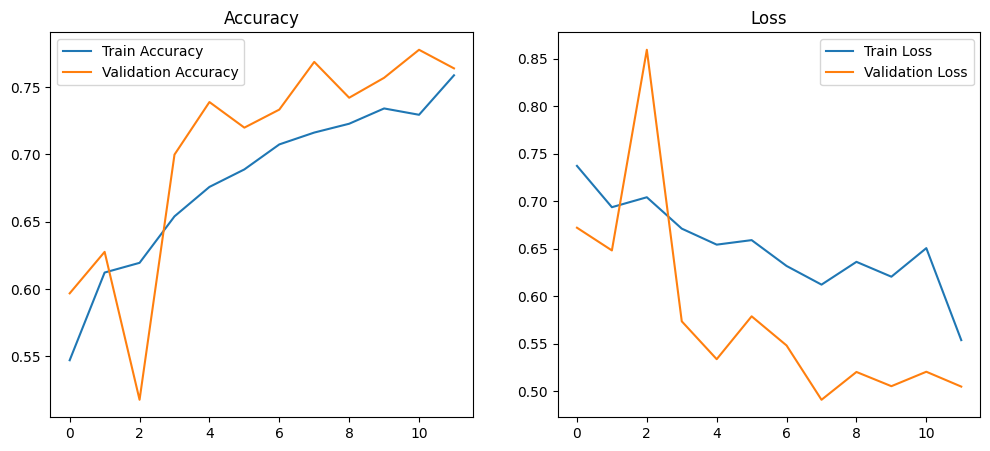

In [18]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()


plt.show()

### Save the Model

In [85]:
model.save("../models/cats_dogs_classification_model.keras")

In [ ]:
#from tensorflow.keras.models import load_model

#model = load_model("../models/cats_dogs_cnn_model.h5")


### Predict on Random Test Image

In [17]:
test_dir = "../data/test1"
test_images = os.listdir(test_dir)
print("Total test images:", len(test_images))

Total test images: 12500


In [70]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


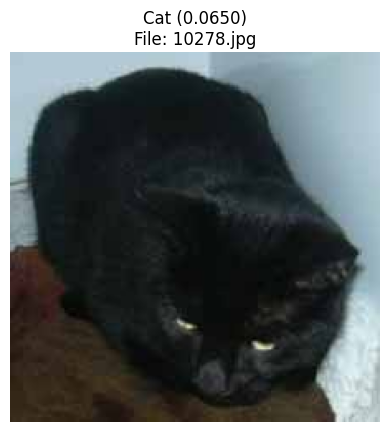

In [80]:
random_img = random.choice(test_images)
img_path = os.path.join(test_dir, random_img)


img_array, img = prepare_image(img_path)

pred = model.predict(img_array)[0][0]

label = "Dog" if pred > 0.5 else "Cat"

plt.imshow(img)
plt.title(f"{label} ({pred:.4f})\nFile: {random_img}")
plt.axis("off")
plt.show()


### Conclusion
The CNN model successfully classifies cats and dogs with strong validation performance.  
Future improvements could include transfer learning (e.g., using VGG16 or ResNet50)  
to achieve higher accuracy and faster convergence.
